Suppose you run a casino and you suspect that a customer has replaced a die provided by the casino with a "crooked die"; that is, one that has been tampered with to make one of the faces more likely to come up than the others.  You apprehend the alleged cheater and confiscate the die, but now you have to prove that it is crooked.  You roll the die 60 times and get the following results: 

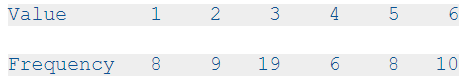

What is the probability of seeing results like this by chance?


Source:
http://allendowney.blogspot.com/2011/05/there-is-only-one-test.html

by Allen Downey, author of Think Stats

https://greenteapress.com/wp/think-stats-2e/

https://github.com/AllenDowney/ThinkStats2

#### Generate data

In [1]:
observed = {1:8, 2:9, 3:19, 4:6, 5:8, 6:10} # observed frequency by value

In [2]:
observed

{1: 8, 2: 9, 3: 19, 4: 6, 5: 8, 6: 10}

In [ ]:
# check the sum
sum(observed.values())

60

In [4]:
# Null hypothesis
expected = {}
for i in range(1,7):
    expected[i] = 10

In [5]:
expected

{1: 10, 2: 10, 3: 10, 4: 10, 5: 10, 6: 10}

#### Define test statistic

To compute a p-value, we have to choose a test statistic that measures how unexpected these results are.  The chi-squared statistic is a reasonable choice: for each value we compare the expected frequency, and the observed frequency, and compute the sum of the squared relative differences (why relative?  Because the variation in the observed values depends on the expected value).

In [7]:
def chi_squared(observed, expected):
    """
    return the squared difference between observed and expected frequency
    """
    total = 0
    for value, exp_freq in expected.items():
        obs_freq = observed[value]
        total += (obs_freq - exp_freq)**2/exp_freq
    return  total

#### Calculate the threshold

In [8]:
threshold = chi_squared(observed, expected)

In [9]:
threshold

10.6

#### Run simulation

In [10]:
import numpy as np

In [11]:
def simulate_rolls(n_rolls):
    """
    return dict freq by value
    """

    sample = np.random.choice(list(range(1,7)), size=60)
    unique, counts = np.unique(sample, return_counts=True)
    freq_by_value = dict(zip(unique, counts))
    for i in range(1,7): # to avoid missing keys
        if i not in freq_by_value:
            freq_by_value[i] = 0
    
    return freq_by_value


In [12]:
n_trials = 10000
n_rolls = 60

results = []
for t in range(n_trials):
    simulated = simulate_rolls(n_rolls)

    results.append(chi_squared(simulated, expected))

#### Plot results

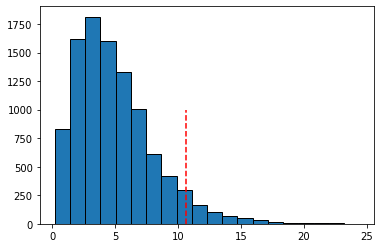

In [13]:
import matplotlib.pyplot as plt

plt.hist(results, bins=20, edgecolor='black');
plt.vlines(x=threshold, ymin=0, ymax=1000, color='red', linestyles='dashed')

#### Calculate the p value

In [ ]:
p_value = len([x for x in results if x > threshold])/n_trials

In [ ]:
p_value

0.0597

For this problem, I could have computed the sample distribution of the test statistic analytically and computed the p-value quickly and exactly.  If I had to run this test many times for large datasets, computational efficiency might be important.  But usually it's not.

And accuracy isn't very important either.  Remember that the test statistic is arbitrary, and the null hypothesis often involves arbitrary choices, too.  There is no point in computing an exact answer to an arbitrary question.

For most problems, we only care about the order of magnitude: if the p-value is smaller that 1/100, the effect is likely to be real; if it is greater than 1/10, probably not.  If you think there is a difference between a 4.8% (significant!) and 5.2% (not significant!), you are taking it too seriously.

So the advantages of analysis are mostly irrelevant, but the disadvantages are not:

1) Analysis often dictates the test statistic; simulation lets you choose whatever test statistic is most appropriate.  For example, if someone is cheating at craps, they will load the die to increase the frequency of 3 and/or 4, not 1 and/or 6.  So in the casino problem the results are suspicious not just because one of the frequencies is high, but also because the frequent value is 3.  We could construct a test statistic that captures this domain knowledge (and the resulting p-value would be lower).

2) Analytic methods are inflexible.  If you have issues like censored data, non-independence, and long-tailed distributions, you won't find an off-the-shelf test; and unless you are a mathematical statistician, you won't be able to make one.  With simulation, these kinds of issues are easy.

3) When people think of analytic methods as black boxes, they often fixate on finding the right test and figuring out how to apply it, instead of thinking carefully about the problem.

In summary, don't worry about finding the "right" test.  There's no such thing.  Put your effort into choosing a test statistic (one that reflects the effect you are testing) and modeling the null hypothesis.  Then simulate it, and count!